# Openreview analysis
This notebook demonstrates and explains how to extract meaningful insights from the OpenReview dataset. The objective is to understand how we can learn from previous paper submissions in order to identify patterns that contribute to writing more successful (i.e., accepted) papers.

### Authors
Dorijan Di Zepp - dorijan.dizepp@studenti.unitn.it

# Dataset analysis

The first step, before applying any machine learning models, is to explore and understand the structure of the dataset. This helps us identify which fields are the most informative for our analysis and which ones can be safely ignored. By doing so, we gain a better view of the available data and also improve the efficiency of our computations by filtering out irrelevant or redundant information.

In [ ]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install seaborn
%pip install torch
%pip install transformers

In [2]:
import pandas as pd

# first of all we need to import the dataset
# we will use pandas to import the dataset from 2020
url = "./tp_2020conference.xlsx"
df = pd.read_excel(url)

# printing some general information about the dataset downloaded
print(df.shape)
print(df.columns)
df.head()



(7766, 19)
Index(['title', 'publish_time', 'abstract', 'keyword', 'tL_DL', 'titlelength',
       'paper_decision_time', 'paper_decision', 'paper_decision_comment',
       'paper_decision_commentlength', 'review_publish_time', 'reviewer_level',
       'paper_score', 'rate', 'review_score_one', 'review_score_two',
       'review_score_three', 'review', 'review_contentlength'],
      dtype='object')


,title,publish_time,abstract,keyword,tL_DL,titlelength,paper_decision_time,paper_decision,paper_decision_comment,paper_decision_commentlength,review_publish_time,reviewer_level,paper_score,rate,review_score_one,review_score_two,review_score_three,review,review_contentlength
0,"Carpe Diem, Seize the Samples Uncertain *at th...",26 Sep 2019 (modified: 20 Dec 2019),Abstract:###The performance of deep neural net...,"Keywords:###batch selection, uncertain sample,...",TL;DR:###We explore the issue of truly uncerta...,97,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Reject,Comment:###The authors propose a new mini-batc...,847,26 Oct 2019 (modified: 23 Nov 2019) 15 Nov 2019,Experience Assessment:###I have published in t...,Rating:###3: Weak Reject,3.0,Review Assessment: Thoroughness In Paper Readi...,Review Assessment: Checking Correctness Of Exp...,Review Assessment: Checking Correctness Of Der...,"This paper proposes Recency Bias, an adaptive...",5156
1,"Carpe Diem, Seize the Samples Uncertain *at th...",26 Sep 2019 (modified: 20 Dec 2019),Abstract:###The performance of deep neural net...,"Keywords:###batch selection, uncertain sample,...",TL;DR:###We explore the issue of truly uncerta...,97,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Reject,Comment:###The authors propose a new mini-batc...,847,23 Oct 2019 (modified: 06 Nov 2019) 15 Nov 2019,Experience Assessment:###I have read many pape...,Rating:###3: Weak Reject,3.0,Review Assessment: Thoroughness In Paper Readi...,Review Assessment: Checking Correctness Of Exp...,Review Assessment: Checking Correctness Of Der...,Review:###This paper proposes an interesting h...,1877
2,"Carpe Diem, Seize the Samples Uncertain *at th...",26 Sep 2019 (modified: 20 Dec 2019),Abstract:###The performance of deep neural net...,"Keywords:###batch selection, uncertain sample,...",TL;DR:###We explore the issue of truly uncerta...,97,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Reject,Comment:###The authors propose a new mini-batc...,847,17 Oct 2019 (modified: 06 Nov 2019) 15 Nov 2019,Experience Assessment:###I do not know much ab...,Rating:###6: Weak Accept,6.0,Review Assessment: Thoroughness In Paper Readi...,Review Assessment: Checking Correctness Of Exp...,Review Assessment: Checking Correctness Of Der...,Review:###This paper explores a well motivated...,2026
3,Prestopping: How Does Early Stopping Help Gene...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Noisy labels are very common in re...,"Keywords:###noisy label, label noise, robustne...",TL;DR:###We propose a novel two-phase training...,90,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Reject,Comment:###This paper focuses on avoiding over...,940,30 Oct 2019 (modified: 06 Nov 2019) 14 Nov 201...,Experience Assessment:###I have read many pape...,Rating:###3: Weak Reject,3.0,Review Assessment: Thoroughness In Paper Readi...,Review Assessment: Checking Correctness Of Exp...,Review Assessment: Checking Correctness Of Der...,Review:###This paper proposes a training strat...,2640
4,Prestopping: How Does Early Stopping Help Gene...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Noisy labels are very common in re...,"Keywords:###noisy label, label noise, robustne...",TL;DR:###We propose a novel two-phase training...,90,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Reject,Comment:###This paper focuses on avoiding over...,940,30 Oct 2019 (modified: 06 Nov 2019) 14 Nov 201...,Experience Assessment:###I have read many pape...,Rating:###6: Weak Accept,6.0,Review Assessment: Thoroughness In Paper Readi...,Review Assessment: Checking Correctness Of Exp...,Review Assessment: Checking Correctness Of Der...,Review:###This paper presents a training appro...,1418


As we can observe, the dataset contains 19 columns and 7,766 rows. However, the rows are not all unique, the same paper may appear multiple times, as each paper typically receives more than one review before being accepted.

In [3]:
# check if there are missing values
print(df.isnull().sum())

# count unique values per column
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))

# count and print unique keywords
from collections import Counter

keywords = df['keyword'].dropna().str.lower().str.split(';|,')
flat_keywords = [kw.strip() for sublist in keywords for kw in sublist]
Counter(flat_keywords).most_common(20)

title                              0
publish_time                       0
abstract                           0
keyword                          867
tL_DL                           1977
titlelength                        0
paper_decision_time                6
paper_decision                  1075
paper_decision_comment          1033
paper_decision_commentlength       0
review_publish_time                0
reviewer_level                     0
paper_score                        0
rate                            6346
review_score_one                   0
review_score_two                   0
review_score_three                 0
review                             0
review_contentlength               0
dtype: int64

--- title ---
title
Reanalysis of Variance Reduced Temporal Difference Learning | OpenReview                   5
Equivariant Entity-Relationship Networks | OpenReview                                      5
Recurrent Hierarchical Topic-Guided Neural Language Models | OpenReview      

[('deep learning', 591),
 ('reinforcement learning', 357),
 ('keywords:###reinforcement learning', 347),
 ('keywords:###deep learning', 305),
 ('representation learning', 236),
 ('generalization', 130),
 ('natural language processing', 125),
 ('generative models', 122),
 ('transfer learning', 120),
 ('interpretability', 111),
 ('robustness', 108),
 ('neural networks', 105),
 ('optimization', 103),
 ('unsupervised learning', 97),
 ('keywords:###meta-learning', 97),
 ('keywords:###adversarial examples', 90),
 ('graph neural networks', 86),
 ('keywords:###graph neural networks', 86),
 ('variational inference', 85),
 ('keywords:###deep reinforcement learning', 85)]

The dataset is incomplete in some aspects. For instance, the rate column does not always contain the actual review rating. However, this information can be retrieved from the paper score column, which is similar to the score column but also includes a rating label.

Additionally, we notice that many values are not unique. This information can be valuable for optimizing certain computations, as it may help reduce redundancy in the data processing.

Let's visualize the total number of rejections and acceptances.

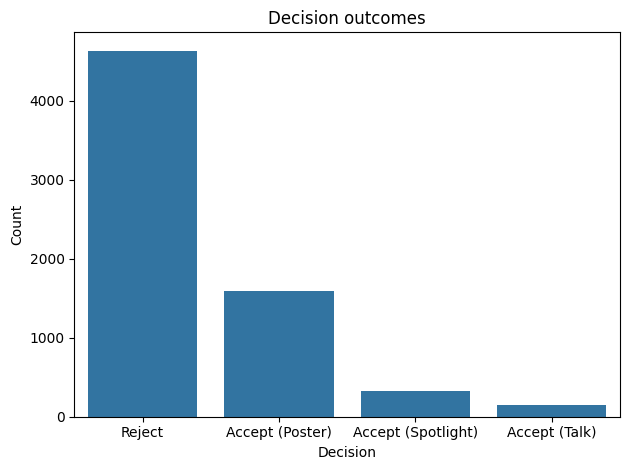

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

paper_decision = df["paper_decision"].value_counts(dropna=True)
decision_label = ["Reject", "Accept (Poster)", "Accept (Spotlight)", "Accept (Talk)"]
paper_decision.index = decision_label

fig, ax = plt.subplots(1,1)
sns.barplot(data=paper_decision, ax=ax)
ax.set_xlabel("Decision")
ax.set_ylabel("Count")
ax.set_title("Decision outcomes")
fig.tight_layout()

Getting a paper accepted is a challenging task, especially since a paper can be rejected multiple times before it is eventually accepted.

Based on the previous plot, we can estimate the probability of a paper being rejected or accepted simply computing the ratio. It is important to consider that the same paper may experience multiple rejections before ultimately being accepted. This of course will probably overshot the rejection percentage but in this analysis, we are going to consider each review as being done on an individual paper as at each "iteration", the paper can be considered different from the previous one because of changes made.

In [5]:
print (df['paper_decision'].value_counts(normalize=True) * 100)


paper_decision
Decision:###Reject                69.316993
Decision:###Accept (Poster)       23.733373
Decision:###Accept (Spotlight)     4.782544
Decision:###Accept (Talk)          2.167090
Name: proportion, dtype: float64


Approximately 70% of the papers in the dataset have been rejected, which is quite a large proportion.

One of the first questions that comes to my mind is whether there is a correlation between a paper's acceptance or rejection and its keywords.

In [6]:
from collections import defaultdict

# create a dictionary to count accepted and total papers for each keyword
keyword_stats = defaultdict(lambda: {'accepted': 0, 'total': 0})

for idx, row in df.iterrows():
    keywords = str(row['keyword']).replace("Keywords:###", "")
    decision = row['paper_decision']

    if pd.notna(keywords):
        for keyword in keywords.lower().split(','):
            keyword = keyword.strip()
            keyword_stats[keyword]['total'] += 1
            if pd.notna(decision) and 'Decision:###Reject' not in decision:
                keyword_stats[keyword]['accepted'] += 1

# turn the stats into a dataframe
# as it is much easier to manipulate after
keyword_df = pd.DataFrame([
    {'keyword': k,
     'total': v['total'],
     'accepted': v['accepted'],
     'acceptance_rate': v['accepted'] / v['total'] * 100}
    for k, v in keyword_stats.items()
])

print(keyword_df)


                     keyword  total  accepted  acceptance_rate
0            batch selection      3         0         0.000000
1           uncertain sample      3         0         0.000000
2               acceleration     18         6        33.333333
3                convergence     19        10        52.631579
4                noisy label      7         0         0.000000
...                      ...    ...       ...              ...
4095             homogeneous      3         3       100.000000
4096        provable defense      3         3       100.000000
4097      convex relaxations      3         3       100.000000
4098         knowledge bases      3         3       100.000000
4099  data structures for qa      3         3       100.000000

[4100 rows x 4 columns]


Some keywords have a high acceptance rate (e.g., "homogeneous," "provable defense"), while others are associated with papers that have never been accepted (e.g., "batch selection," "uncertain sample").

We can hypothesize that certain keywords may have very high acceptance rates, suggesting they correspond to topics the conference tends to favor. This could be the case for frequently occurring keywords, though it may also simply be a coincidence. On the other hand, popular keywords with low acceptance rates might point to highly competitive or saturated areas.

Regardless, this information can guide our analysis. By focusing on papers with keywords that have a higher acceptance rate, we can potentially increase the likelihood of selecting papers with a higher probability of acceptance, while excluding those with keywords that are less likely to be accepted.

To further explore this, we will also investigate any potential relationship between paper outcomes and keywords using a simple random forest model.

The general idea of finding this type of correlation is also to drop most of the papers that at the end have not / might not be accepted in order to speed up computation for other ml models as we will see later (even a simple llm model might require a lot of time for a single input). 


=== Classification report ===
                                precision    recall  f1-score   support

   Decision:###Accept (Poster)       1.00      0.86      0.92       319
Decision:###Accept (Spotlight)       1.00      0.87      0.93        68
     Decision:###Accept (Talk)       1.00      0.88      0.94        34
            Decision:###Reject       0.90      1.00      0.95       920
                        Reject       0.98      0.81      0.89       213

                      accuracy                           0.94      1554
                     macro avg       0.98      0.88      0.92      1554
                  weighted avg       0.94      0.94      0.93      1554


=== Top 20 most predictive keywords ===
deep learning: 0.0106
reinforcement learning: 0.0051
representation learning: 0.0044
natural language processing: 0.0035
robustness: 0.0032
interpretability: 0.0031
meta-learning: 0.0031
computer vision: 0.0029
exploration: 0.0028
imitation learning: 0.0028
transfer learning: 

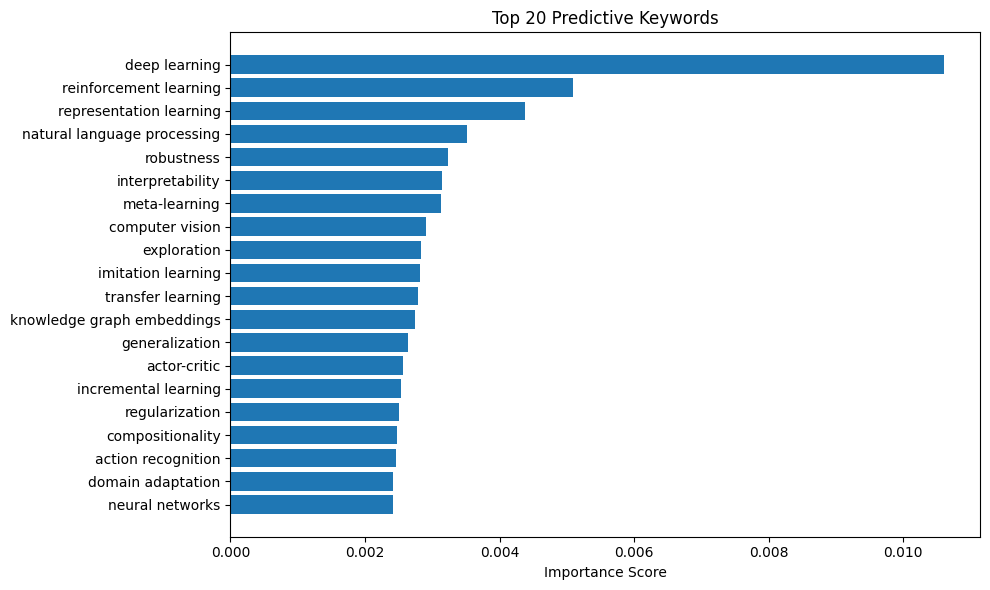

In [7]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df = df.copy() # to be sure we don't modify the previous data frame

# cleaning and prepare keywords
df['keyword'] = df['keyword'].fillna('')
df['clean_keywords'] = df['keyword'].apply(
    lambda x: [kw.strip().lower() for kw in x.replace("Keywords:###", "").split(',') if kw.strip()]
)

# obtain unique keywords
all_keywords = [kw for kws in df['clean_keywords'] for kw in kws]
unique_keywords = sorted(set(all_keywords))

# transform into binary features
mlb = MultiLabelBinarizer(classes=unique_keywords)
X_keywords = mlb.fit_transform(df['clean_keywords'])

# encode target
df['paper_decision'] = df['paper_decision'].fillna('Reject')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['paper_decision'])

# split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_keywords, y, test_size=0.2, random_state=42
)

# train random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# evaluation and results
y_pred = model.predict(X_test)
print("\n=== Classification report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

importances = model.feature_importances_
keyword_importance = sorted(zip(mlb.classes_, importances), key=lambda x: x[1], reverse=True)

print("\n=== Top 20 most predictive keywords ===")
for kw, score in keyword_importance[:20]:
    print(f"{kw}: {score:.4f}")

# a simple bar plot to visualize keyword importance
top_keywords, scores = zip(*keyword_importance[:20])
plt.figure(figsize=(10, 6))
plt.barh(top_keywords[::-1], scores[::-1])
plt.xlabel("Importance Score")
plt.title("Top 20 Predictive Keywords")
plt.tight_layout()
plt.show()


We found that keywords like "deep learning," "reinforcement learning" and "representation learning" have the highest importance within the model. This suggests that these tags either correlate with higher acceptance rates or exhibit a clear, consistent decision pattern (whether accepted or rejected).

However, it’s important to note that a high importance score doesn’t necessarily imply a direct correlation with acceptance. It simply means the keyword plays a significant role in the classification, regardless of whether it leans towards acceptance or rejection.

In [8]:
keyword_outcome_compare = keyword_df[["keyword", "acceptance_rate"]]

keywords, scores = zip(*keyword_importance)
model_keywords_df = pd.DataFrame({
    'keyword': keywords,
    'importance': scores
})

comparison_df = pd.merge(model_keywords_df, keyword_outcome_compare, on="keyword", how="left")

print(comparison_df)

# multiply the model importance scores by 100
comparison_df['importance'] = comparison_df['importance'] * 100

# sort by importance for better visualization
comparison_df = comparison_df.sort_values(by='importance', ascending=False)


                          keyword  importance  acceptance_rate
0                   deep learning    0.010611        28.683036
1          reinforcement learning    0.005089        30.681818
2         representation learning    0.004383        21.782178
3     natural language processing    0.003511        20.786517
4                      robustness    0.003241        30.434783
...                           ...         ...              ...
4094             supperresolution    0.000000         0.000000
4095         ternary quantization    0.000000         0.000000
4096               text-to-speech    0.000000         0.000000
4097               transformer-xh    0.000000       100.000000
4098             weight averaging    0.000000         0.000000

[4099 rows x 3 columns]


What can be said about this result?

We have compared two methods to assess the importance of keywords and their relationship with paper acceptance rates.

## Statistical Approach:
The first approach relies on a statistical method, which simply counts the occurrences of each keyword in the dataset and tracks how many times each keyword is associated with accepted papers. This method provides a quick way to assess the likelihood of a paper's acceptance based on the presence of certain keywords. However, the frequency of a keyword is a crucial factor here, as more frequent keywords are likely to appear in successful papers, giving this method an inherent bias toward high-frequency terms.

## Machine Learning Approach:
The second method leverages machine learning to assess the importance of each keyword in predicting the acceptance or rejection of papers. Here, too, the frequency of a keyword plays an important role in determining its importance in the model. Keywords with higher frequency are more likely to have more accurate predictions because they are present in more papers, while rarer keywords may have less statistical power due to limited data.

## Conclusion:
By combining both the statistical insights (frequency and acceptance rate) and the machine learning model's keyword importance, we can derive a more nuanced understanding of which keywords are likely to indicate successful papers. Frequently occurring, high-importance keywords in the model often correlate with higher acceptance rates. However, even keywords that appear less frequently but are deemed highly important by the model may still significantly contribute to a paper's likelihood of success.

# Determining acceptance score

The strategy involves focusing on papers whose keywords have a high acceptance rate (e.g. ≥ 80%) to better understand what factors contribute to paper acceptance.

## Handling Multiple Keywords
- Some papers may have multiple keywords, one with a high acceptance rate and another with a lower acceptance rate. We need to define a formula for the paper score considering both cases.

- Assuming each keyword's acceptance is independent, we can compute the average acceptance rate for all keywords associated with a paper. If the average acceptance rate exceeds a given threshold (e.g., 80%), this would suggest a higher likelihood of acceptance for that paper. This allows us to handle cases where papers have mixed keywords in terms of acceptance rates.

## Analyzing Reviews for Recurring Patterns
Once we have identified the papers with keywords that have high acceptance rates, we can then dive deeper into their reviews. The aim is to identify recurring patterns, which may include:

- Frequent phrases, these could indicate common strengths or weaknesses across accepted papers.

- Sentiment and tone, positive or negative tones in the reviews may help correlate specific attributes with higher acceptance.

- Review scores, are there particular sections that consistently receive higher or lower scores? These might point to areas that are particularly important for success.

## Additional Considerations

- Acceptance is not solely determined by keywords, it's important to keep in mind that other factors, beyond just the keywords, may play a significant role in the acceptance of a paper. For example, the paper's overall structure, the clarity of writing, novelty, technical depth, and contributions to the field could also be crucial.

- Keyword importance is just one piece of the puzzle, while a high acceptance rate for certain keywords can guide us, it's essential to balance this with other aspects of the paper that contribute to its success. By analyzing the reviews and the overall paper content, we can gain a deeper understanding of what drives success in accepted papers.



In [9]:
keyword_probs = dict(zip(keyword_df['keyword'], keyword_df['acceptance_rate'] / 100))
threshold = 0.8  # acceptance rate of a paper based on the avergae of the keywords probabilities
likely_accepted_papers = []

# iterate each paper
for idx, row in df.iterrows():
    keywords = str(row['keyword']).replace("Keywords:###", "")

    if pd.notna(keywords) and keywords.strip():
        keyword_list = [kw.strip().lower() for kw in keywords.split(',')]

        # take all proabilities of paper keywords
        keyword_acceptances = [keyword_probs[kw] for kw in keyword_list if kw in keyword_probs]

        if keyword_acceptances:
            avg_acceptance = sum(keyword_acceptances) / len(keyword_acceptances)

            if avg_acceptance >= threshold:
                # paper likely to be accepted
                # store also the average acceptance
                paper_info = row.to_dict()
                paper_info['avg_keyword_acceptance'] = avg_acceptance
                likely_accepted_papers.append(paper_info)

likely_accepted_df = pd.DataFrame(likely_accepted_papers)

#printing of title papers
unique_likely_papers = likely_accepted_df.drop_duplicates(subset=['title'], ignore_index=False)
unique_likely_papers[['title', 'avg_keyword_acceptance']]


,title,avg_keyword_acceptance
0,Learning deep graph matching with channel-inde...,1.000000
3,Graph inference learning for semi-supervised c...,1.000000
6,Evaluating The Search Phase of Neural Architec...,0.838542
9,"To Relieve Your Headache of Training an MRF, T...",0.811321
12,Weakly Supervised Clustering by Exploiting Uni...,0.833333
...,...,...
320,Rotation-invariant clustering of functional ce...,0.857366
323,Causal Discovery with Reinforcement Learning |...,0.826705
326,High Fidelity Speech Synthesis with Adversaria...,0.854167
329,Convolutional Conditional Neural Processes | O...,0.833333


Here we will compute the final acceptance score that is given by the avergae keywords acceptance score and the model acceptance score.\
Given that I think both scores are important, the final score is a simple weighted average where each of the two scores have same importance that is, 50%.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

keyword_probs = dict(zip(keyword_df['keyword'], keyword_df['acceptance_rate'] / 100))

threshold = 0.8  # acceptance rate threshold (this can be modified based on the needs)
likely_accepted_papers = []

# iterate each paper to determine the score and filter out
# the ones that are below the threshold
for idx, row in df.iterrows():
    keywords = str(row['keyword']).replace("Keywords:###", "")

    if pd.notna(keywords) and keywords.strip():
        keyword_list = [kw.strip().lower() for kw in keywords.split(',')]

        keyword_acceptances = [keyword_probs[kw] for kw in keyword_list if kw in keyword_probs]

        if keyword_acceptances:
            # the "statistical way", basedon keywords frequencies
            avg_keyword_acceptance = sum(keyword_acceptances) / len(keyword_acceptances)

            # the "ml way", using the trained random forest
            features = mlb.transform([keyword_list])
            model_acceptance_score = model.predict_proba(features)[:, 1]
            model_acceptance_score = model_acceptance_score[0]

            # combine both scores
            final_acceptance_score = (avg_keyword_acceptance + model_acceptance_score) / 2 # both have same weigth
            # in the case the ml model shoudl have more weight, just change the ratio

            # if above threshold, likely to be accepted
            if final_acceptance_score >= threshold:
                paper_info = row.to_dict()
                paper_info['avg_keyword_acceptance'] = avg_keyword_acceptance
                paper_info['model_acceptance_score'] = model_acceptance_score
                paper_info['final_acceptance_score'] = final_acceptance_score
                likely_accepted_papers.append(paper_info)

likely_accepted_df = pd.DataFrame(likely_accepted_papers)

# drop duplicates based on paper title to displat relevant columns
unique_likely_papers = likely_accepted_df.drop_duplicates(subset=['title'], ignore_index=False)
unique_likely_papers[['title', 'avg_keyword_acceptance', 'model_acceptance_score', 'final_acceptance_score']]


,title,avg_keyword_acceptance,model_acceptance_score,final_acceptance_score
0,Program Guided Agent | OpenReview,0.881138,0.880000,0.880569
3,InfoGraph: Unsupervised and Semi-supervised Gr...,0.714286,0.971016,0.842651
6,On Robustness of Neural Ordinary Differential ...,1.000000,0.971079,0.985540
9,Estimating Gradients for Discrete Random Varia...,0.879545,0.980000,0.929773
12,A Signal Propagation Perspective for Pruning N...,0.833333,0.950916,0.892125
15,WHITE NOISE ANALYSIS OF NEURAL NETWORKS | Open...,0.747888,0.940000,0.843944
19,Online and stochastic optimization beyond Lips...,0.791667,0.921725,0.856696
22,Encoding word order in complex embeddings | Op...,0.772727,1.000000,0.886364
26,DDSP: Differentiable Digital Signal Processing...,0.803991,0.920000,0.861996
29,Finite Depth and Width Corrections to the Neur...,0.755072,0.930792,0.842932


By setting a threshold of 80% for the acceptance rate of keywords, we narrow down the dataset to 114 papers. This selection is based on the premise that papers with keywords having high acceptance rates are more likely to be successful. However, it's important to highlight a few considerations:

- By averaging the acceptance rates of all keywords associated with a paper, we may end up with papers that have a lower average keyword acceptance rate compared to others. This discrepancy arises because of the frequency of specific keywords in the paper. A paper with several high-acceptance keywords may still have a lower overall average if it contains other low-acceptance keywords.

- To mitigate this, we integrate the score given by the trained model. This model score helps to balance the final score, offering a more comprehensive perspective on the paper's potential for acceptance beyond just keyword frequency.


An interesting observation is that the dataset, which includes non-unique paper names (due to multiple reviews per paper), provides a "review history" for each paper. This enables us to explore several dimensions:

- By grouping reviews by paper title, we can track how the sentiment towards a paper changes across different review instances. This helps in understanding whether the overall perception of the paper evolves positively or negatively as revisions are made.

- Some papers may start with weaker reviews but show improvement as revisions are made. This analysis allows us to see if there are key changes that contributed to better acceptance.

- By analyzing the review comments and their sentiment, we can attempt to identify which types of feedback (positive or negative) are most correlated with a paper's acceptance. This could reveal common strengths or weaknesses pointed out by reviewers that impact the acceptance decision.

Given the complexity of the task, we will focus only on comuting the sentiment and the key aspects of each review such that it will be possible to understand why a certain paper has been accepted in the end and which modification have been adopted.

In [11]:
for title, group in likely_accepted_df.groupby('title'):
    print(f"\nPaper: {title}")
    print(group[['paper_score', 'rate', 'review']])



Paper: A Probabilistic Formulation of Unsupervised Text Style Transfer | OpenReview
                 paper_score  rate  \
73       Rating:###8: Accept   NaN   
74  Rating:###6: Weak Accept   NaN   
75  Rating:###6: Weak Accept   NaN   

                                               review  
73  Review:###Summary: This paper introduces a pro...  
74  Review:###In this paper, the authors propose a...  
75   The main contribution of this paper is a prin...  

Paper: A Signal Propagation Perspective for Pruning Neural Networks at Initialization | OpenReview
                 paper_score  rate  \
12  Rating:###6: Weak Accept   NaN   
13       Rating:###8: Accept   NaN   
14  Rating:###3: Weak Reject   NaN   

                                               review  
12  Review:###In this paper, the authors studied a...  
13   This paper analyzes how signals propagate thr...  
14  Review:###The paper introduces a signal propag...  

Paper: At Stability*s Edge: How to Adjust Hyperparameters to

The next step in our analysis is to extract key aspects from the reviews while also determining whether the comments are positive or negative. By doing this, we will gain a clearer understanding of the feedback associated with each paper, allowing us to identify if the review praised the paper or if there were specific issues that led to the rejection.
Steps Involved:

- We will extract key aspects of each review, focusing on recurring phrases, comments, and feedback that highlight the strengths or weaknesses of the paper.

- Sentiment analysis will be performed to categorize each review as positive or negative. This helps us immediately understand if the feedback was supportive or pointed out issues that could lead to rejection.

In [ ]:
import re
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

# initialize sentiment analysis pipeline with batching to speedup the process
sentiment_analyzer = pipeline('sentiment-analysis', batch_size=16, device=0 if torch.cuda.is_available() else -1)

# we will use facebook pretrained model, it is quite fast but still returns in good results
summarization_tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
summarization_model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# use GPU if available to speedup more computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
summarization_model.to(device)

# clean up review data from useless prefix
def clean_review(review):
    return re.sub(r'^Review:###', '', str(review)).strip()

def analyze_review_sentiment(review):
    if pd.isna(review) or not review.strip():
        return None, None

    result = sentiment_analyzer(review[:512])
    sentiment = result[0]['label'] if result else None
    score = result[0]['score'] if result else None
    return sentiment, score

def extract_key_aspects(review):
    if pd.isna(review) or not review.strip():
        return None

    review = clean_review(review)

    inputs = summarization_tokenizer(
        review,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)

    # these params should result in good summary results
    summary_ids = summarization_model.generate(
        **inputs,
        max_length=150,
        min_length=50,
        length_penalty=1.0,
        num_beams=6,
        repetition_penalty=2.5,
        no_repeat_ngram_size=3,
        early_stopping=True
    )

    return summarization_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# sentiment analysis
likely_accepted_df['review_sentiment'], likely_accepted_df['review_score'] = zip(*likely_accepted_df['review'].apply(analyze_review_sentiment))

# key aspect extraction
likely_accepted_df['key_aspects'] = likely_accepted_df['review'].apply(extract_key_aspects)


By analyzing the key aspects of the reviews, we can derive a summary of what made a paper good or bad. This involves examining the content and sentiment of each review, which gives us a clear picture of the strengths and weaknesses highlighted by reviewers.

We could take this analysis a step further by tokenizing the key aspects to identify specific terms that correlate with paper acceptance or rejection. For instance, if the term "dense" is frequently associated with rejections, we could infer that "dense" content might negatively affect the chances of acceptance.

However, this is a time-consuming process, and implementing it would require a lot of additional resources, time and knowledge, which is beyond the scope of this analysis.

In this case, we will focus on the more immediate task of extracting and analyzing key aspects from the reviews, allowing us to draw meaningful conclusions without diving into the more complex task of token-based analysis.


In [13]:
likely_accepted_df.to_excel("likely_accepted_papers_key_aspects.xlsx")
likely_accepted_df.head(20)

,title,publish_time,abstract,keyword,tL_DL,titlelength,paper_decision_time,paper_decision,paper_decision_comment,paper_decision_commentlength,...,review_score_three,review,review_contentlength,clean_keywords,avg_keyword_acceptance,model_acceptance_score,final_acceptance_score,review_sentiment,review_score,key_aspects
0,Program Guided Agent | OpenReview,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Developing agents that can learn t...,"Keywords:###Program Execution, Program Executo...",TL;DR:###We propose a modular framework that c...,33,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper provides a fascinating h...,334,...,Review Assessment: Checking Correctness Of Der...,Review:###This paper provides a method for ins...,3167,"[program execution, program executor, program ...",0.881138,0.880000,0.880569,NEGATIVE,0.861503,This paper provides a method for instructing a...
1,Program Guided Agent | OpenReview,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Developing agents that can learn t...,"Keywords:###Program Execution, Program Executo...",TL;DR:###We propose a modular framework that c...,33,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper provides a fascinating h...,334,...,Review Assessment: Checking Correctness Of Der...,Review:###This paper presents a reinforcement ...,5898,"[program execution, program executor, program ...",0.881138,0.880000,0.880569,NEGATIVE,0.978788,This paper presents a reinforcement learning a...
2,Program Guided Agent | OpenReview,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Developing agents that can learn t...,"Keywords:###Program Execution, Program Executo...",TL;DR:###We propose a modular framework that c...,33,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper provides a fascinating h...,334,...,Review Assessment: Checking Correctness Of Der...,Review:###Update: I thank the reviewers for th...,4357,"[program execution, program executor, program ...",0.881138,0.880000,0.880569,POSITIVE,0.970360,This paper investigates an important direction...
3,InfoGraph: Unsupervised and Semi-supervised Gr...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###This paper studies learning the re...,Keywords:###graph-level representation learnin...,NaN,128,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper proposes a graph embeddi...,705,...,Review Assessment: Checking Correctness Of Der...,Review:###The paper presents a new graph repre...,1852,"[graph-level representation learning, mutual i...",0.714286,0.971016,0.842651,POSITIVE,0.996070,The paper presents a new graph representation ...
4,InfoGraph: Unsupervised and Semi-supervised Gr...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###This paper studies learning the re...,Keywords:###graph-level representation learnin...,NaN,128,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper proposes a graph embeddi...,705,...,Review Assessment: Checking Correctness Of Der...,Review:###The paper presents an unsupervised m...,1737,"[graph-level representation learning, mutual i...",0.714286,0.971016,0.842651,NEGATIVE,0.997988,The paper presents an unsupervised method for ...
5,InfoGraph: Unsupervised and Semi-supervised Gr...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###This paper studies learning the re...,Keywords:###graph-level representation learnin...,NaN,128,20 Dec 2019 (modified: 20 Dec 2019),Decision:###Accept (Spotlight),Comment:###This paper proposes a graph embeddi...,705,...,Review Assessment: Checking Correctness Of Der...,"Review:###In this paper, the authors propose a...",2143,"[graph-level representation learning, mutual i...",0.714286,0.971016,0.842651,POSITIVE,0.986369,"In this paper, the authors propose a graph-lev..."
6,On Robustness of Neural Ordinary Differential ...,26 Sep 2019 (modified: 20 Dec 2019),Abstract:###Neural ordinary differential equat...,Keywords

As seen in the output, the model not only generates a sentiment for each paper, with a corresponding confidence score (indicating the model's certainty), but also provides a brief summary explaining the reasons behind the sentiment. This summary helps us understand why a paper is considered positive or negative.

Additionally, it's worth noting that the first three lines in the output pertain to the same paper but show three different outcomes. This is particularly insightful for two reasons:

- We can observe that the same paper underwent several reviews, each with different feedback.

- By analyzing these changing outcomes, we can gain insights into how the paper evolved and what improvements were made in response to reviewer feedback. This also sheds light on what the reviewers liked and, more importantly, what to avoid in future submissions to minimize the risk of rejection.

In [14]:
likely_accepted_df = likely_accepted_df.reset_index()

import textwrap

def print_key_aspects_by_title(paper_title):
    subset = likely_accepted_df[likely_accepted_df["title"] == paper_title]

    if subset.empty:
        print(f"No reviews found for title: {paper_title}")
        return

    cleaned = subset["key_aspects"].str.strip().str.replace(r'\s+', ' ', regex=True)

    for i, text in enumerate(cleaned, start=1):
        print(f"\n=== Key Aspects from review {i} ===")
        print("\n".join(textwrap.wrap(text, width=100)))

print("\n=== PAPER: Program Guided Agent | OpenReview ===")
print_key_aspects_by_title("Program Guided Agent | OpenReview")

print("\n=== PAPER: WHITE NOISE ANALYSIS OF NEURAL NETWORKS | OpenReview ===")
print_key_aspects_by_title("WHITE NOISE ANALYSIS OF NEURAL NETWORKS | OpenReview")



=== PAPER: Program Guided Agent | OpenReview ===

=== Key Aspects from review 1 ===
This paper provides a method for instructing an agent using programs as input instructions. The
arguments in this paper are well made but the paper would benefit from better clarifying several
points. In particular, it was unclear how the DSL comes about and what restrictions it places on the
problem.

=== Key Aspects from review 2 ===
This paper presents a reinforcement learning agent that learns to execute tasks specified in a form
of programs with an architecture consisting of three modules. The (fixed) interpreter module
interprets the program, by issuing queries to a (pre-trained) vision module and giving goals to a
policy module that executes them in the environment. The paper also introduces a policy modulation
technique, with the goal of modulating the current state with the expected (symbolic) goal. The
model is evaluated on a 2D approximation of Minecraft, where it outperforms a set of baseli

As it is possible to see, we obtain the key aspects of each review made to the requested paper. Another observation that can be made is that the review sentiment is not necessarily a positive one but, as it is normal through different review iterations, a negative one.

For example, for the first paper "Program Guided Agent | Openreivew" we obtained that it received three reviews, all of which provide useful insight into how it was perceived throughout the review process.

The **first review** presents a mixed perspective. While it acknowledges that the paper makes solid arguments, it also points out that some important details were unclear—specifically, the origin and limitations of the domain-specific language (DSL) used to guide the agent. This indicates that, at this stage, the reviewer saw potential in the paper but felt it needed clearer exposition.

The **second review** is more positive. It appreciates the architecture proposed by the authors, particularly the modular structure involving a fixed interpreter, a vision module, and a policy module. The reviewer also highlights the novelty of the proposed policy modulation technique and notes strong experimental results in a Minecraft-like environment, where the method outperforms baseline models. This review signals a favorable impression of both the paper's technical contribution and its empirical validation.

The **third review** is very supportive and emphasizes the importance of the research direction. It praises the approach of using programs to guide reinforcement learning agents and commends the paper’s ability to generalize to larger, unseen program inputs. The tone here clearly leans toward acceptance, reinforcing the idea that the paper addresses a valuable problem and offers a strong, well-tested solution.

This progression highlights how iterative feedback and refinement can turn a promising but initially unclear submission into a well-received paper. It further illustrates how identifying and addressing reviewer concerns early on can significantly impact a paper’s final outcome.


How can we apply these information for a paper that we are writing or also as a general tip on writing good papers?

### For a similar specific topic
First, clarity is fundamental. One reviewer pointed out that certain components, like the DSL (domain-specific language), were not clearly explained. If your paper uses a custom language, module, or framework, it’s important to define it thoroughly, explain how it is constructed, and describe any limitations it may have.

Second, the reviewers responded positively to a modular approach in the model architecture. If your paper uses a system composed of multiple interacting parts, be sure to describe each module’s role clearly, how they interact, and what the benefit of this design is.

Third, even small contributions like introducing a new mechanism (in this case, “policy modulation”) were appreciated. If your work includes similar technical contributions, highlight them clearly, give them a name, and show how they impact performance through experiments or ablation studies.

Another key point is generalization. Reviewers noted that the model generalized to more complex tasks than those seen during training. If your method can generalize to different settings or more complex cases, make sure to demonstrate and emphasize this. Generalization is often considered a strong indicator of a model’s robustness and applicability.

### Beyond specific topic
Beyond specific content, the reviews show that reviewers value both technical performance and the broader research direction. Even if your results are modest, positioning your work as contributing to a long-term research question can make it more compelling.

Lastly, your paper structure matters. Reviewers often form their impressions based on the abstract, introduction, and visual elements. Make sure these parts are clear, concise, and informative, as they are likely to be the first things readers will engage with.


If we put together all the key aspects of each papers' review, we can derive a database of information on how to both write papers for a specific topic but also determine "general rules" on how to write nice papers.

# Conclusion
To understand what contributes to a paper being accepted — and therefore how to write better papers — I based my methodology on analyzing features of already accepted papers. The intuition is simple: if we want to write better papers, we should learn from the ones that succeeded.

Specifically, I combined two complementary sources of information:

- Keyword-based acceptance rate, this provides a simple and fast value by analyzing how often certain keywords appear in accepted papers. It reflects the historical success of topics and terminology in the field. By identifying high-acceptance-rate keywords, we can understand the topics that are more likely to align with the expectations of the reviewing community.

- Machine learning model prediction, a Random Forest classifier was trained on labeled data (accepted vs. rejected) using keyword features. This adds a data-driven perspective, capturing patterns and interactions not immediately obvious through traditional statistics alone. The model allows us to quantify the importance of each keyword, providing insights into which topics or terms have a stronger correlation with acceptance or rejection.

By averaging these two components, I created a more balanced and explainable score, the final acceptance likelihood. This score allows us to:

- Identify keywords and topics that are statistically linked with acceptance, highlighting trends in successful research.

- Estimate a paper's chances of being accepted based on its content, providing authors with a metric that quantifies their paper's alignment with successful patterns.

- Provide actionable feedback to authors, guiding them on how to align their paper with historically accepted research.

However, understanding what not to do is equally important. Therefore, this same approach can be extended to rejected papers, helping highlight topics, structures, or keyword combinations that are statistically less successful. These insights provide negative signals, things to avoid or improve, which are just as valuable as positive patterns.

Furthermore, by analyzing the key aspects of accepted papers (as extracted from their reviews), we can distill common themes and feedback that led to their success. By training a machine learning model on this data, we could even create a generalizable guide on how to write successful papers based on the specific elements that reviewers appreciated across a broad spectrum of accepted works.

Finally, this project served as a way to explore how meaningful knowledge can be extracted from data and how such insights can be leveraged for further analytical methods. While not a complete or exhaustive study, it already touches on several interesting themes, from keyword-based analysis to sentiment interpretation and demonstrates how even limited data, when well-analyzed, can offer valuable understanding.\
Given the time constraints and the limited knowledge on the use of modern machine learning models, the work provides a nice foundation and allows for further investigations.